In [43]:
import sqlite3
from util import *
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
conn = sqlite3.connect("data/crypto.db")


In [45]:
# res = conn.execute("SELECT * FROM daily_ohlcv LIMIT 100")
# res.fetchall()

In [55]:
advdec_query = """
WITH 
ad AS (
SELECT
  DATE(timestamp) AS Date,
  SUM(CASE WHEN close > open THEN 1 ELSE 0 END) AS adv,
  SUM(CASE WHEN close > open THEN 0 ELSE 1 END) AS dec,
  COUNT(*) AS total_symbols	
FROM daily_ohlcv 
  WHERE pair LIKE '%/BTC' OR pair LIKE 'BTC/%'
GROUP BY 1
)
,
btc AS (
  SELECT
  date(timestamp) AS Date,
  open AS btc_open,
  high AS btc_high,
  low AS btc_low,
  close AS btc_close,
  volume AS btc_volume
  FROM
    daily_ohlcv
  WHERE
    pair = 'BTC/USDT'
)

SELECT
  ad.*,
  btc.btc_open,
  btc.btc_high,
  btc.btc_low,
  btc.btc_close,
  btc.btc_volume
FROM
  ad JOIN btc on ad.Date = btc.Date
ORDER BY ad.Date ASC
"""

In [56]:
res = conn.execute(advdec_query).fetchall()

In [57]:
len(res)

738

In [71]:
df = None
columns = ['Date', 'Adv', 'Dec', 'all', 'btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume']
df = pd.DataFrame(data=res, columns=columns)

df.set_index('Date')
# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dtypes
df.loc[502]

Date          2019-01-01
Adv                  109
Dec                   41
all                  150
btc_open         3701.23
btc_high         3810.16
btc_low             3642
btc_close        3797.14
btc_volume       23741.7
Name: 502, dtype: object

In [72]:
# df = pd.DataFrame(res)
# df.columns = ['Date', 'Adv', 'Dec', 'all', 'btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume']
df

Date  Adv  Dec  all  btc_open  btc_high   btc_low  btc_close  \
0    2017-08-17    5    2    7   4261.48   4485.39   4200.74    4285.08   
1    2017-08-18    5    3    8   4285.08   4371.52   3938.77    4108.37   
2    2017-08-19    4    4    8   4108.37   4184.69   3850.00    4139.98   
3    2017-08-20    5    3    8   4120.98   4211.08   4032.62    4086.29   
4    2017-08-21    3    5    8   4069.13   4119.62   3911.79    4016.00   
5    2017-08-22    3    5    8   4016.00   4104.82   3400.00    4040.00   
6    2017-08-23    6    2    8   4040.00   4265.80   4013.89    4114.01   
7    2017-08-24    3    6    9   4147.00   4371.68   4085.01    4316.01   
8    2017-08-25    4    5    9   4316.01   4453.91   4247.48    4280.68   
9    2017-08-26    7    2    9   4280.71   4367.00   4212.41    4337.44   
10   2017-08-27    6    4   10   4332.51   4400.00   4285.54    4310.01   
11   2017-08-28    5    5   10   4310.01   4399.82   4124.54    4386.69   
12   2017-08-29    3    7   10   4353.65   4625.85   4313.55    4587.48   
13   2017-08-30    5    5   10   4564.52   4647.51   4416.01    4555.14   
14   2017-08-31    3    7   10   4555.14   4745.42   4555.14    4724.89   
15   2017-09-01    5    6   11   4689.89   4885.55   4654.88    4834.91   
16   2017-09-02    4    7   11   4796.16   4939.19   4286.87    4472.14   
17   2017-09-03    5    7   12   4508.50   4714.76   4298.33    4509.08   
18   2017-09-04    0   13   13   4505.00   4527.49   3972.51    4100.11   
19   2017-09-05    8    5   13   4106.97   4484.99   3603.00    4366.47   
20   2017-09-06    5    8   13   4366.49   4662.87   4335.26    4619.77   
21   2017-09-07    9    3   12   4619.77   4788.59   4438.19    4691.61   
22   2017-09-08    2   10   12   4691.66   4735.39   4028.93    4282.80   
23   2017-09-09    2   10   12   4282.80   4426.62   4150.06    4258.81   
24   2017-09-10    4    7   11   4258.81   4283.00   3801.00    4130.37   
25   2017-09-11    7    3   10   4153.62   4334.43   4098.91    4208.47   
26   2017-09-12    1   10   11   4208.60   4394.59   4040.80    4163.72   
27   2017-09-13    4    8   12   4159.72   4165.38   3760.00    3944.69   
28   2017-09-14    4    9   13   3944.00   3993.00   3165.13    3189.02   
29   2017-09-15    9    4   13   3188.01   3856.00   2817.00    3700.00   
..          ...  ...  ...  ...       ...       ...       ...        ...   
708  2019-07-26  108   52  160   9882.15   9889.98   9637.00    9824.00   
709  2019-07-27   26  134  160   9824.00  10188.66   9333.00    9476.52   
710  2019-07-28   90   70  160   9478.92   9594.99   9165.00    9541.54   
711  2019-07-29   65   95  160   9541.54   9729.00   9395.00    9507.64   
712  2019-07-30   45  115  160   9509.07   9714.28   9402.00    9574.21   
713  2019-07-31   14  146  160   9575.00  10109.80   9555.00   10080.53   
714  2019-08-01   14  147  161  10080.53  10467.86   9863.46   10374.99   
715  2019-08-02   48  113  161  10375.00  10670.00  10281.35   10523.75   
716  2019-08-03   20  142  162  10523.75  10904.77  10497.93   10816.86   
717  2019-08-04   33  129  162  10816.86  11040.00  10552.00   10929.23   
718  2019-08-05   14  148  162  10929.99  11937.52  10927.80   11828.80   
719  2019-08-06   43  119  162  11830.00  12330.70  11226.70   11481.69   
720  2019-08-07   20  142  162  11481.69  12141.17  11382.84   11975.03   
721  2019-08-08   43  119  162  11975.04  12060.00  11521.00   11999.77   
722  2019-08-09   25  137  162  11994.17  12045.68  11700.00   11879.99   
723  2019-08-10  144   18  162  11879.98  11985.00  11270.00   11309.31   
724  2019-08-11   68   94  162  11309.24  11600.00  11112.11   11549.97   
725  2019-08-12   89   73  162  11539.08  11577.89  11235.32   11396.08   
726  2019-08-13  123   39  162  11398.35  11456.16  10788.45   10892.71   
727  2019-08-14   29  133  162  10893.36  10897.48   9928.10   10050.37   
728  2019-08-15   56  106  162  10055.16  10460.00   9911.00   10293.93   
729  2019-08-16   30  132  162  1029

In [51]:
# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# plt.figure(figsize=(16,6)) 
# plt.plot(df['btc_close'])
# plt.show()

In [52]:
df = msci(df, adjusted=True)

/Users/simon/Projects/mcclellan/util.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MCSI'][0] = 0
/Users/simon/Projects/mcclellan/util.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MCSI'][i] = df['MCSI'][i-1] + df['MCO'][i]


In [53]:
df

Date  Adv  Dec  all  btc_open  btc_high   btc_low  btc_close  \
0    2017-08-17    8    5   13   4261.48   4485.39   4200.74    4285.08   
1    2017-08-18    6    8   14   4285.08   4371.52   3938.77    4108.37   
2    2017-08-19    6    8   14   4108.37   4184.69   3850.00    4139.98   
3    2017-08-20    9    5   14   4120.98   4211.08   4032.62    4086.29   
4    2017-08-21    4   11   15   4069.13   4119.62   3911.79    4016.00   
5    2017-08-22    6   10   16   4016.00   4104.82   3400.00    4040.00   
6    2017-08-23   13    5   18   4040.00   4265.80   4013.89    4114.01   
7    2017-08-24    7   12   19   4147.00   4371.68   4085.01    4316.01   
8    2017-08-25    7   12   19   4316.01   4453.91   4247.48    4280.68   
9    2017-08-26   14    5   19   4280.71   4367.00   4212.41    4337.44   
10   2017-08-27    9   12   21   4332.51   4400.00   4285.54    4310.01   
11   2017-08-28   10   11   21   4310.01   4399.82   4124.54    4386.69   
12   2017-08-29    6   15   21   4353.65   4625.85   4313.55    4587.48   
13   2017-08-30    7   14   21   4564.52   4647.51   4416.01    4555.14   
14   2017-08-31    9   12   21   4555.14   4745.42   4555.14    4724.89   
15   2017-09-01   13   10   23   4689.89   4885.55   4654.88    4834.91   
16   2017-09-02    7   16   23   4796.16   4939.19   4286.87    4472.14   
17   2017-09-03   12   12   24   4508.50   4714.76   4298.33    4509.08   
18   2017-09-04    2   23   25   4505.00   4527.49   3972.51    4100.11   
19   2017-09-05   13   12   25   4106.97   4484.99   3603.00    4366.47   
20   2017-09-06    9   16   25   4366.49   4662.87   4335.26    4619.77   
21   2017-09-07   17    7   24   4619.77   4788.59   4438.19    4691.61   
22   2017-09-08    4   20   24   4691.66   4735.39   4028.93    4282.80   
23   2017-09-09    7   18   25   4282.80   4426.62   4150.06    4258.81   
24   2017-09-10    5   17   22   4258.81   4283.00   3801.00    4130.37   
25   2017-09-11   13    8   21   4153.62   4334.43   4098.91    4208.47   
26   2017-09-12    4   19   23   4208.60   4394.59   4040.80    4163.72   
27   2017-09-13    6   19   25   4159.72   4165.38   3760.00    3944.69   
28   2017-09-14   10   17   27   3944.00   3993.00   3165.13    3189.02   
29   2017-09-15   19    8   27   3188.01   3856.00   2817.00    3700.00   
..          ...  ...  ...  ...       ...       ...       ...        ...   
708  2019-07-26  365  166  531   9882.15   9889.98   9637.00    9824.00   
709  2019-07-27  127  406  533   9824.00  10188.66   9333.00    9476.52   
710  2019-07-28  249  284  533   9478.92   9594.99   9165.00    9541.54   
711  2019-07-29  242  291  533   9541.54   9729.00   9395.00    9507.64   
712  2019-07-30  211  322  533   9509.07   9714.28   9402.00    9574.21   
713  2019-07-31  152  381  533   9575.00  10109.80   9555.00   10080.53   
714  2019-08-01   70  467  537  10080.53  10467.86   9863.46   10374.99   
715  2019-08-02  237  300  537  10375.00  10670.00  10281.35   10523.75   
716  2019-08-03  153  387  540  10523.75  10904.77  10497.93   10816.86   
717  2019-08-04  181  359  540  10816.86  11040.00  10552.00   10929.23   
718  2019-08-05  152  388  540  10929.99  11937.52  10927.80   11828.80   
719  2019-08-06  140  400  540  11830.00  12330.70  11226.70   11481.69   
720  2019-08-07  120  420  540  11481.69  12141.17  11382.84   11975.03   
721  2019-08-08  168  373  541  11975.04  12060.00  11521.00   11999.77   
722  2019-08-09  126  415  541  11994.17  12045.68  11700.00   11879.99   
723  2019-08-10  422  119  541  11879.98  11985.00  11270.00   11309.31   
724  2019-08-11  249  292  541  11309.24  11600.00  11112.11   11549.97   
725  2019-08-12  283  258  541  11539.08  11577.89  11235.32   11396.08   
726  2019-08-13  258  285  543  11398.35  11456.16  10788.45   10892.71   
727  2019-08-14  137  406  543  10893.36  10897.48   9928.10   10050.37   
728  2019-08-15  244  299  543  10055.16  10460.00   9911.00   10293.93   
729  2019-08-16  154  389  543  1029

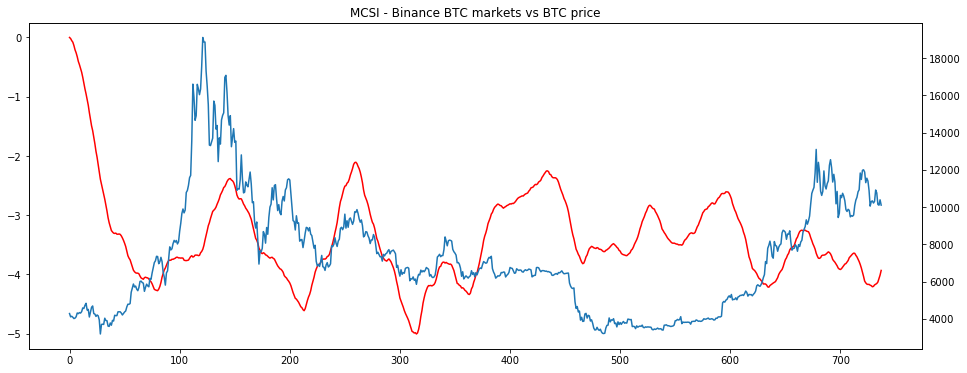

In [54]:
# plt.figure(figsize=(16,6)) 
# plt.plot(df['MCSI'])
fig, ax1 = plt.subplots(figsize=(16,6))

ax1.plot(df['MCSI'], color = 'red')
ax1.set_title("MCSI - Binance BTC markets vs BTC price")

ax2 = ax1.twinx()

# ax1.set_facecolor('red')
ax2.plot(df['btc_close'])
# plt.plot(df['btc_close'])
plt.show()